## ML solution proposed by : **PRIYAM SAHA**

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h1>Heart Disease Attribute Information</h1>


<b> age:</b> age in years<br>
<b> sex:</b> sex (1 = male; 0 = female)<br>
<b> cp:</b> chest pain type<br>
-- Value 1: typical angina<br>
-- Value 2: atypical angina<br>
-- Value 3: non-anginal pain<br>
-- Value 4: asymptomatic<br>
<b> trestbps:</b> resting blood pressure (in mm Hg on admission to the hospital)<br>
<b> chol:</b> serum cholestoral in mg/dl<br>
<b> fbs:</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
<b> restecg:</b> resting electrocardiographic results<br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
<b> thalach:</b> maximum heart rate achieved<br>
<b> exang:</b> exercise induced angina (1 = yes; 0 = no)<br>
<b> oldpeak:</b> ST depression induced by exercise relative to rest<br>
<b> slope:</b> the slope of the peak exercise ST segment<br>
-- Value 1: upsloping<br>
-- Value 2: flat<br>
-- Value 3: downsloping<br>
<b> ca:</b> number of major vessels (0-3) colored by flourosopy<br>
<b> thal:</b> 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
<b> num:</b> diagnosis of heart disease (angiographic disease status)<br>
-- Value 0: < 50% diameter narrowing<br>
-- Value 1: > 50% diameter narrowing<br>
<br>
<i>SOURCE : UCI Machine Learning Repository</i>

## Importing Python Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action="ignore")
import time
import seaborn as sns

# Load Dataset

In [2]:
file="HeartAttack_data.csv"
df=pd.read_csv(file,na_values=['?'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [3]:
#Get the column names from DataFrame object
col_names=df.columns.values
print(col_names)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'num']


# Exploratory Data Analysis

In [4]:
df.shape

(294, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [7]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,False,False,False,False,False,False,False,False,False,False,True,True,True,False
290,False,False,False,False,False,False,False,False,False,False,False,True,True,False
291,False,False,False,False,False,False,False,False,False,False,False,True,True,False
292,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
#count the NaN in each column individually.Calling sum() of DataFrame returned by isnull will give a series containing
#data about count of NaN in each column
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

In [9]:
df['trestbps'].fillna(df['trestbps'].median(),inplace=True)
df['restecg'].fillna(df['restecg'].median(),inplace=True)
df['thalach'].fillna(df['thalach'].median(),inplace=True)
df['exang'].fillna(df['exang'].median(),inplace=True)
df['chol'].fillna(df['chol'].median(),inplace=True)
df['fbs'].fillna(df['fbs'].median(),inplace=True)
#df['slope'].fillna(df['slope'].median(),inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,243.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

In [11]:
df.drop(columns=['ca','slope','thal'],inplace=True)


In [12]:
# Creating Lists of Continuous and Categorical Values
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 65 66]
sex : [1 0]
cp : [2 1 3 4]
trestbps : [130. 120. 140. 170. 100. 105. 110. 125. 150.  98. 112. 145. 190. 160.
 115. 142. 180. 132. 135. 108. 124. 113. 122.  92. 118. 106. 200. 138.
 136. 128. 155.]
chol : [132. 243. 237. 219. 198. 225. 254. 298. 161. 214. 220. 160. 167. 308.
 264. 166. 340. 209. 260. 211. 173. 283. 194. 223. 315. 275. 297. 292.
 182. 200. 204. 241. 339. 147. 273. 307. 289. 215. 281. 250. 184. 245.
 291. 295. 269. 196. 268. 228. 358. 201. 249. 266. 186. 207. 218. 412.
 224. 238. 230. 163. 240. 280. 257. 263. 276. 284. 195. 227. 253. 187.
 202. 328. 168. 216. 129. 190. 188. 179. 210. 272. 180. 100. 259. 468.
 274. 320. 221. 309. 312. 171. 208. 246. 305. 217. 365. 344. 394. 256.
 326. 277. 270. 229.  85. 347. 251. 222. 287. 318. 213. 294. 193. 271.
 156. 267. 282. 117. 466. 247. 226. 265. 206. 288. 303. 338. 248. 306.
 529. 392. 231. 329. 355. 233. 242

In [13]:
# Printing all categorical values
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'num']

In [14]:
df.shape

(294, 11)

In [15]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.574830,250.234694,0.068027,0.217687,139.132653,0.302721,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.597108,64.982245,0.252222,0.460257,23.549514,0.460219,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.250000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


Now it seems that our dataframe is complete and no null values

### Histogram Plot of features

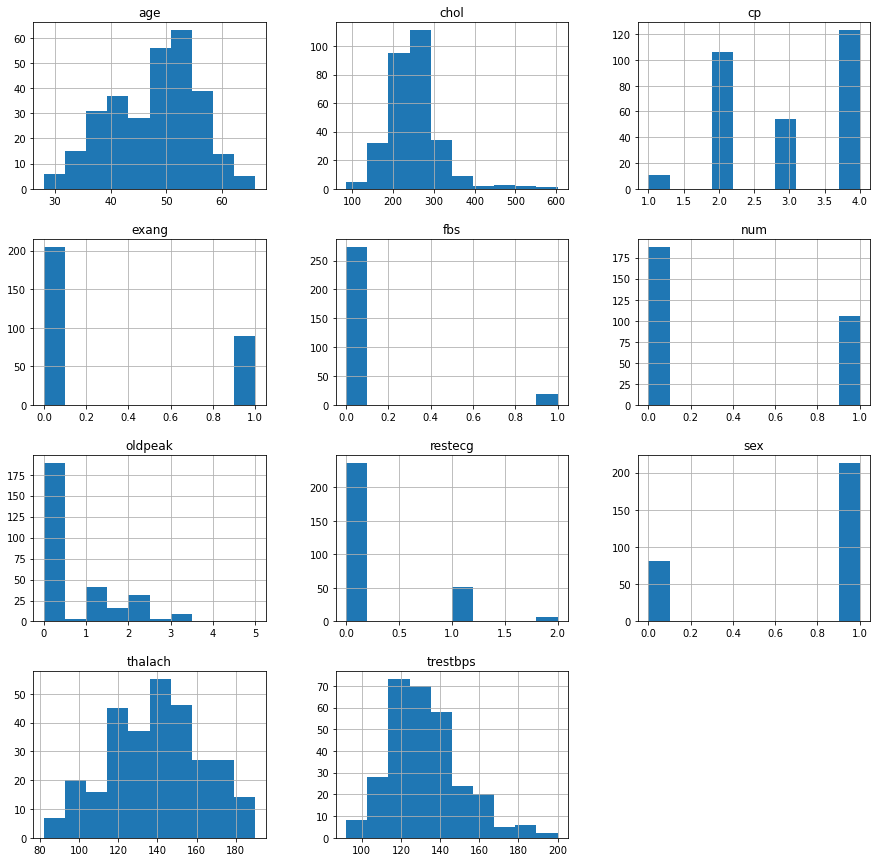

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize']=[15,15]
df.hist()
plt.show()

### Density Plot

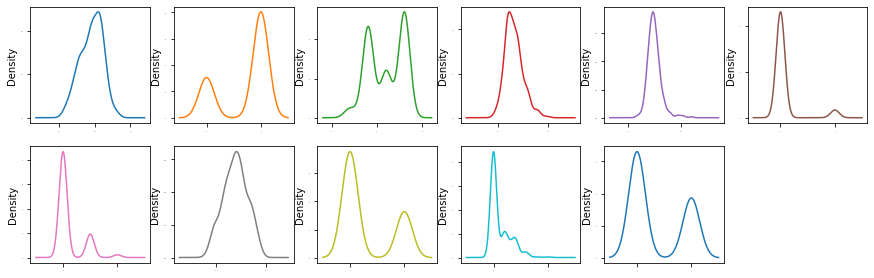

In [17]:
plt.rcParams['figure.figsize']=[15,15]
df.plot(kind='density', subplots=True, layout=(6,6), sharex=False, legend=False, fontsize=1)

plt.show()

## Correlation 

In [18]:
corr=df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,0.013618,0.145826,0.245183,0.086355,0.180962,0.050407,-0.459416,0.238698,0.177707,0.159315
sex,0.013618,1.000000,0.249875,0.089519,0.028167,0.045663,-0.105503,-0.111482,0.157761,0.118931,0.272781
cp,0.145826,0.249875,1.000000,0.085986,0.135515,0.032810,-0.014687,-0.369909,0.495723,0.353109,0.505864
trestbps,0.245183,0.089519,0.085986,1.000000,0.079408,0.097277,0.012309,-0.184973,0.214020,0.205201,0.139953
chol,0.086355,0.028167,0.135515,0.079408,1.000000,0.108554,0.050778,-0.121550,0.163551,0.109371,0.205087
fbs,0.180962,0.045663,0.032810,0.097277,0.108554,1.000000,0.048400,-0.070477,0.116010,0.063722,0.162869
restecg,0.050407,-0.105503,-0.014687,0.012309,0.050778,0.048400,1.000000,0.004884,0.042309,0.043192,-0.031988
thalach,-0.459416,-0.111482,-0.369909,-0.184973,-0.121550,-0.070477,0.004884,1.000000,-0.401764,-0.301572,-0.331168
exang,0.238698,0.157761,0.495723,0.214020,0.163551,0.116010,0.042309,-0.401764,1.000000,0.625510,0.584541
oldpeak,0.177707,0.118931,0.353109,0.205201,0.109371,0.063722,0.043192,-0.301572,0.625510,1.000000,0.545700


In [19]:
#take absolute values of correalations
features=df.drop(['num'], axis = 1)
corrs=[abs(corr[attr]['num']) for attr in list(features)]
#make a list of pairs [(corr, features)]
l=list(zip(corrs,list(features)))
print("Absolute of correlations \n",corrs)
print("List of pairs [(corr,features)]\n",l)

Absolute of correlations 
 [0.15931455732511296, 0.2727813388215424, 0.5058639682334106, 0.1399527091385206, 0.2050865550301643, 0.16286862099987282, 0.03198823969423465, 0.3311676708892531, 0.5845413626083458, 0.5457003935413585]
List of pairs [(corr,features)]
 [(0.15931455732511296, 'age'), (0.2727813388215424, 'sex'), (0.5058639682334106, 'cp'), (0.1399527091385206, 'trestbps'), (0.2050865550301643, 'chol'), (0.16286862099987282, 'fbs'), (0.03198823969423465, 'restecg'), (0.3311676708892531, 'thalach'), (0.5845413626083458, 'exang'), (0.5457003935413585, 'oldpeak')]


In [20]:
#Sort the list of pairs in reverse/descending order with correlation values as the key for sorting 
l.sort(key=lambda x: x[0], reverse=True)
l

[(0.5845413626083458, 'exang'),
 (0.5457003935413585, 'oldpeak'),
 (0.5058639682334106, 'cp'),
 (0.3311676708892531, 'thalach'),
 (0.2727813388215424, 'sex'),
 (0.2050865550301643, 'chol'),
 (0.16286862099987282, 'fbs'),
 (0.15931455732511296, 'age'),
 (0.1399527091385206, 'trestbps'),
 (0.03198823969423465, 'restecg')]

In [21]:
#Unzip pairs of two lists
#zip(*l) -  takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]] and returnsa [[a,d,g],[b,e,h],[e,f,i]]
corrs,labels=list(zip((*l)))
print("corrs = \n",corrs,"labels = \n",labels)

corrs = 
 (0.5845413626083458, 0.5457003935413585, 0.5058639682334106, 0.3311676708892531, 0.2727813388215424, 0.2050865550301643, 0.16286862099987282, 0.15931455732511296, 0.1399527091385206, 0.03198823969423465) labels = 
 ('exang', 'oldpeak', 'cp', 'thalach', 'sex', 'chol', 'fbs', 'age', 'trestbps', 'restecg')


### Bar graph of correlation values

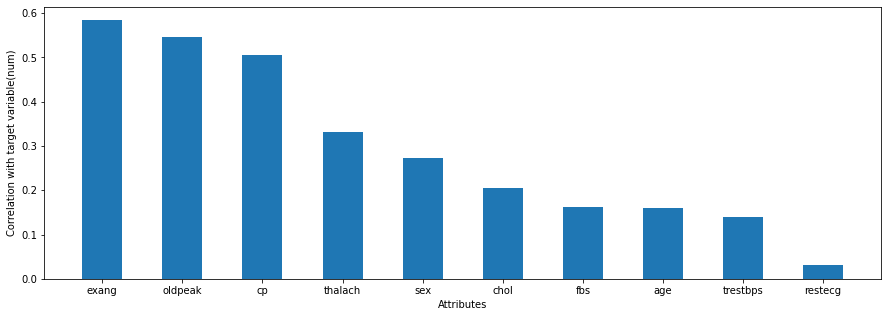

In [22]:
#Plot correlations with respect to the target variables as a bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable(num)')
plt.xticks(index,labels)
plt.show()

From the Bar plot it is evident that restecg can be dropped as it has very low value for coefficient of correlation

In [23]:
print(df.groupby('num').size())

num
0    188
1    106
dtype: int64


# Splitting the Dataset

In [24]:
y = df.num       .values
x_data = df.drop(['num','restecg'], axis = 1) # Dropping 'restecg' as its correlation value is very low so insignificant 

### Normalization

In [25]:

# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

### Splitting into Training and Testing Dataset

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [27]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# Applying Machine Learning Algorithms

## 1. Logistic Regression

In [28]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.05%


## 2. K Neighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 84.75%


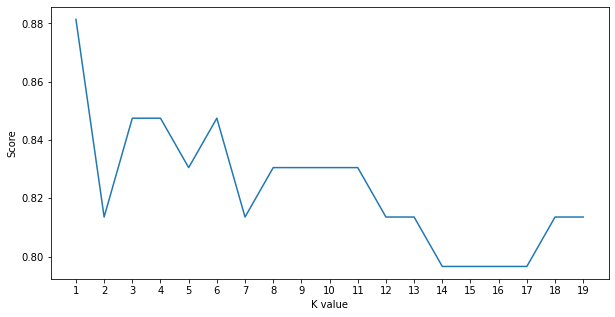

Maximum KNN Score is 88.14%


In [30]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
plt.rcParams['figure.figsize']=[10,5]    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## 3. SVM

In [31]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.05%


## 4.Gaussian Naive Bayes

In [32]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.05%


## 5. Decision Tree Classifier

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 81.36%


## Prediction 

In [34]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)


### Genrating Confusion Matrix

In [35]:

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

In [36]:
print("Confusion Matrix for Logistic Regression\n",cm_lr)
print("Confusion Matrix for K Nearest Neighbors Classifier \n",cm_knn)
print("Confusion Matrix for Support Vector machine\n",cm_svm)
print("Confusion Matrix for Gaussian Naive Bayes\n",cm_nb)
print("Confusion Matrix for Decision Tree\n",cm_dtc)
print("Accuracies of Logistic Regression ",accuracies['Logistic Regression'])
print("Accuracies of K Nearest Neighbors Classifier ",accuracies['KNN'])
print("Accuracies of Support Vector machine ",accuracies['SVM'])
print("Accuracies of Gaussian Naive Bayes ",accuracies['Naive Bayes'])
print("Accuracies of Decision Tree ",accuracies['Decision Tree'])

Confusion Matrix for Logistic Regression
 [[29  4]
 [ 6 20]]
Confusion Matrix for K Nearest Neighbors Classifier 
 [[31  2]
 [ 7 19]]
Confusion Matrix for Support Vector machine
 [[29  4]
 [ 6 20]]
Confusion Matrix for Gaussian Naive Bayes
 [[28  5]
 [ 5 21]]
Confusion Matrix for Decision Tree
 [[30  3]
 [ 8 18]]
Accuracies of Logistic Regression  83.05084745762711
Accuracies of K Nearest Neighbors Classifier  88.13559322033898
Accuracies of Support Vector machine  83.05084745762711
Accuracies of Gaussian Naive Bayes  83.05084745762711
Accuracies of Decision Tree  81.35593220338984


## Plotting Confusion Matrix 

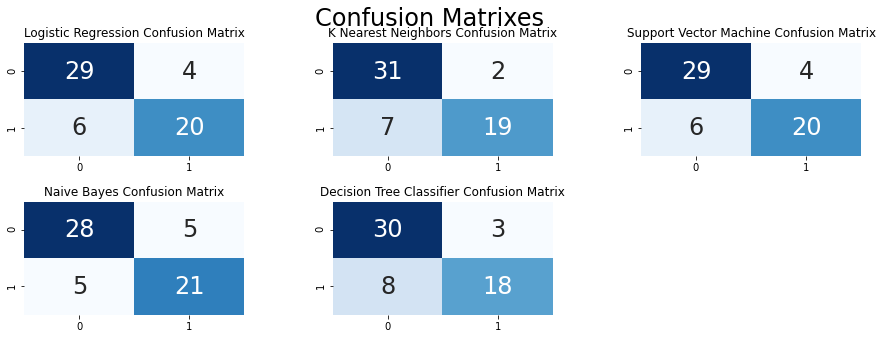

In [37]:
plt.figure(figsize=(15,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()